<a href="https://colab.research.google.com/github/akhilpoola07/Machine-Learning-Projects/blob/main/prediction_CarPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_csv('car data.csv')
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#drop car_name column
df = df.drop(columns=['Car_Name'], errors='ignore')
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
#convert categorical to numerical
df_encoded = pd.get_dummies(df, drop_first=True)
df.head()

,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
x = df_encoded.drop(columns=['Selling_Price'], axis=1)
y = df_encoded['Selling_Price']

In [ ]:
#train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
#

In [ ]:
#train ml model(random forest)
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(
    n_estimators=200,
    criterion='squared_error',
    random_state=42
)
model.fit(x_train, y_train)


RandomForestRegressor(n_estimators=200, random_state=42)

In [ ]:
#evaluate model
from sklearn.metrics import r2_score,median_absolute_error,mean_squared_error
y_pred = model.predict(x_test)
print('R2 score: ', r2_score(y_test, y_pred))
print('MAE: ', median_absolute_error(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


R2 score:  0.9608001431124521
MAE:  0.35224999999998907
MSE:  0.9029916165163913


In [ ]:
#create prediction function
def predict_car_price(year,
                      present_price,
                      km_driven,
                      owner,
                      company,
                      fuel_type,
                      seller_type,
                      transmission):
#input data
  input_data = pd.DataFrame({
    'Year': [year],
    'Present_Price': [present_price],
    'Kms_Driven': [km_driven],
    'Owner': [owner],
    'fuel_type_'+fuel_type: [True],
    'company_'+company: [True],
    'seller_type_'+seller_type: [True],
    'transmission_'+transmission: [True]
  })

  input_data = input_data.reindex(columns=x.columns, fill_value=0)
  predicted_price = model.predict(input_data)
  return predicted_price[0]


In [ ]:
price = predict_car_price(
    year = 2016,
    present_price = 9.0,
    km_driven = 100000,
    owner = 1,
    company = 'Maruti',
    fuel_type = 'Petrol',
    seller_type = 'Individual',
    transmission = 'Manual'
)
print(f"Predicted Car Price: {price:.2f} lakhs")

Predicted Car Price: 6.96 lakhs


In [ ]:
print(f"Predicted Car Price: {price:.2f} lakhs")

Predicted Car Price: 6.96 lakhs


In [52]:
#create shap explainer
!pip install shap
import shap
shap.initjs()


In [53]:
#create an explainer
explainer = shap.TreeExplainer(model)

In [54]:
import shap
#create shap explainer
explainer = shap.TreeExplainer(model)
#caluculate shap values
shap_values = explainer.shap_values(x_test)

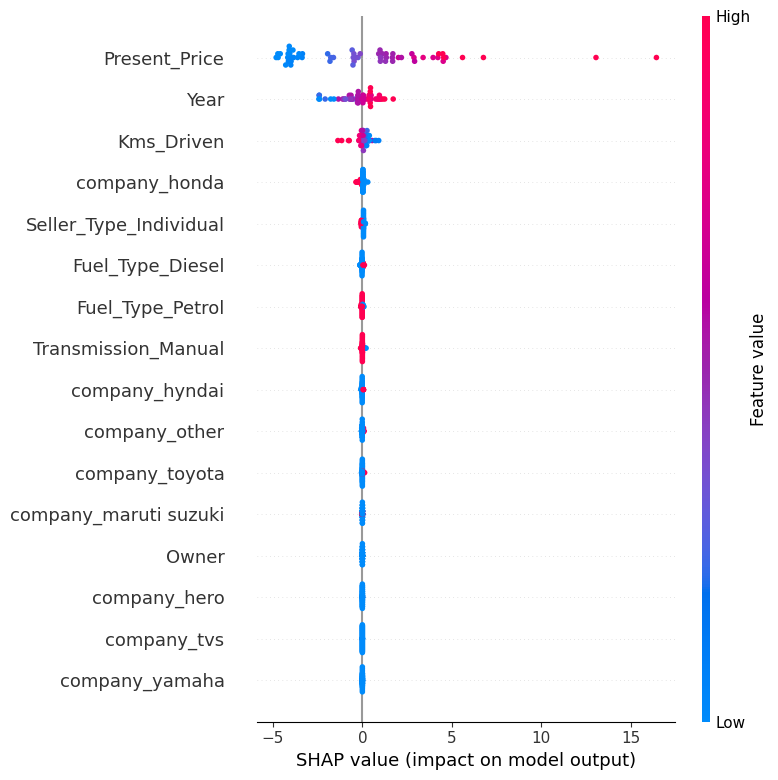

In [56]:
#global explanation
shap.summary_plot(shap_values, x_test)

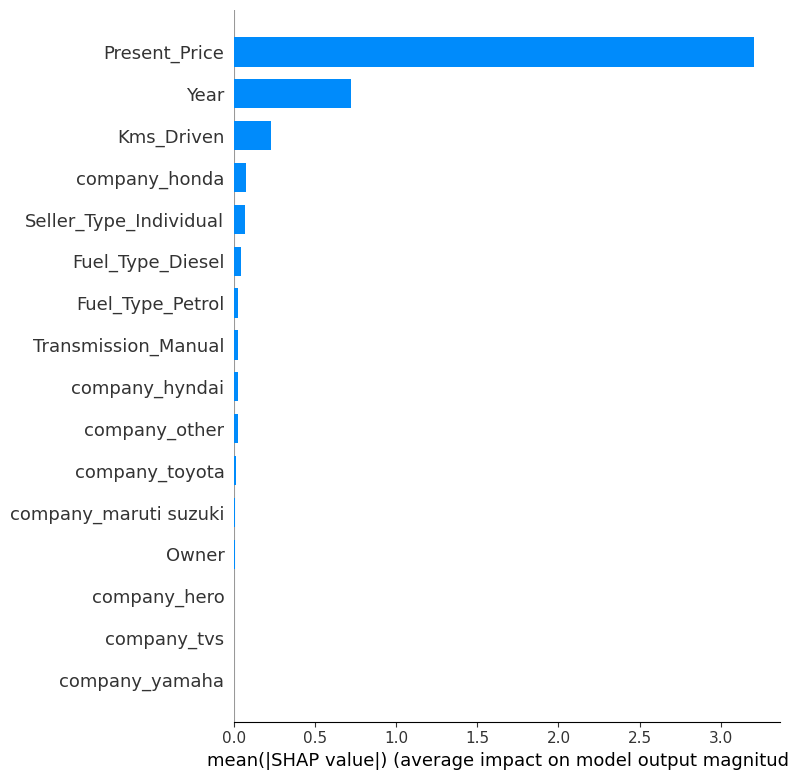

In [57]:
#bar plot
shap.summary_plot(shap_values, x_test, plot_type='bar')

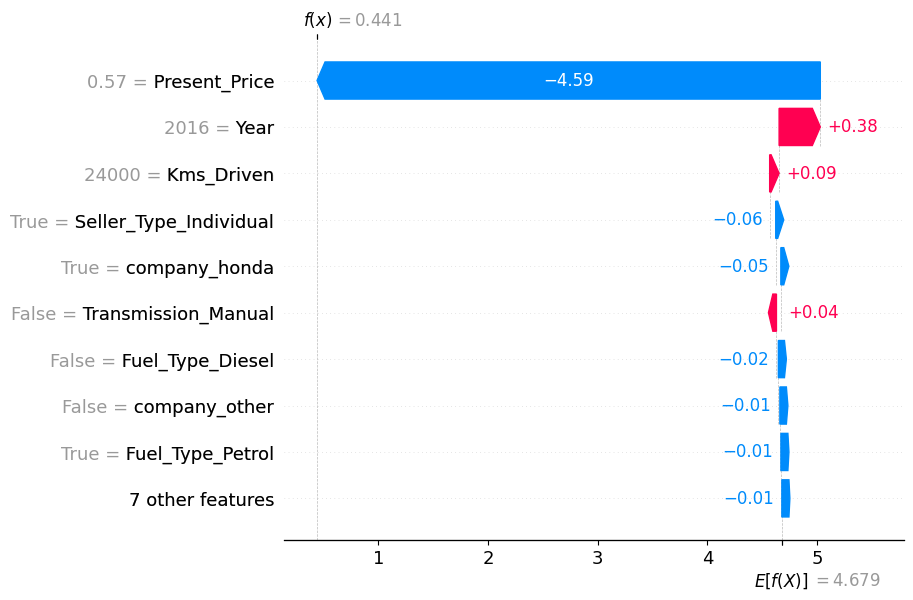

In [58]:
#waterfall plot
shap.plots.waterfall(
    shap.Explanation(
        values=shap_values[0],
        base_values=explainer.expected_value,
        data=x_test.iloc[0],
        feature_names=x_test.columns
    )
)
